# Regresión

In [288]:
# Importación de librerías y funciones necesarias
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.tree import plot_tree

from matplotlib import pyplot as plt

In [289]:
# Cargamos el dataset, poner la ruta donde tengáis el archivo
df = pd.read_csv('datos/housing.csv')

In [290]:
# Función para ver las primeras 10 filas del dataset
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [291]:
# Función con estadísticos básicos
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Regresión

Objetivo: Predecir la variable 'median_house_value'

Vamos a eliminar la varibale ocean_proximity y trabajar con las demás, además de eliminar las filas que contengan datos faltantes.

Además vamos a eliminar algunos valores extremos de la variable objetivo.

In [292]:
df = df.loc[(df['median_house_value'] < 500000), :]
df = df.drop(columns=['ocean_proximity']).dropna()
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


1.- Realiza una representación de la varibale median_house_value, donde en el eje X tengas 'longitude', en el Y 'latitude' y el color venga dado por 'median_house_value'

2.- Divide los datos en los conjuntos de entrenamiento y test (recuerda la función 'train_test_split()')

3.- Ahora necesitamos estandarizar los datos, usa 'StandarScaler()' para estandarizar SOLO las variables predictoras

Ten encuenta también los métodos del scaler y las diferencias entre 'fit' y 'transform'

4.- Genera un modelo de regresión lineal y entrénalo con los datos estandarizados ('LinearRegression()')

5.- Usa el método 'predict()' del modelo para obtener las predicciones en entremiento y represéntalas como mejor creas.

¿Qué crees que está pasando?

6.- Obtén las métricas del modelo en entrenaiento y test (error cuadrático medio, error absoluto medio, coeficiente R2).

Recuerda las funciones como 'mean_squared_error()' o 'r2_score' o busca nuevas en la documentación de scikit-learn

## Decision tree

Vamos a realizar lo mismo pero con un modelo de árbol de decisión

1.- Selecciona un número limitado de observaciones para construir un árbol que se pueda visualizar (quédate con entre 5 y 10 muestras)

2.- Crea un modelo de árbol de decisión para regresión ('DecisionTreeRegressor()') y entrénalo con los datos seleccionados.

Ten en cuenta los parámetros más importantes, echa un ojo a la documentación.

3.- Representa el árbol de decisión ('plot_tree()'). 

En la documentación puedes ver la explicación de los parámetros si necesitas alguno para mejorar la visualización.

4.- Mide el error cometido y el coeficiente R2 de este árbol sobre el conjunto de test

5.- Entrena ahora un árbol con todos los datos de entrenamiento e intenta graficarlo (si te es posible).

Recuerda que ya hemos dividido anteriormente el conjunto en entrenamiento y test, si no, no podríamos comparar los resultados entre modelos.

6.- Obtén las métricas del modelo en entrenaiento y test (error cuadrático medio, error absoluto medio, coeficiente R2).

Recuerda las funciones como 'mean_squared_error()' o 'r2_score' o busca nuevas en la documentación de scikit-learn

7.- Compara ahora los resultados en test entre la regresión lineal, el árbol con muestras limitadas y el árbol entrenado con todos los datos.

## Random Forest

Vamos a continuar con el Random Forest para regresión

1.- Selecciona un número limitado de observaciones para construir árboles que se pueda visualizar (quédate con entre 5 y 10 muestras)

2.- Crea un modelo de random forest para regresión ('RandomForestRegressor()') y entrénalo con los datos seleccionados. Fija el parámetro necesario para que haya un total de 9 árboles.

Ten en cuenta los parámetros más importantes, echa un ojo a la documentación.

3.- Ejecuta este código para representar los 9 árboles de tu random forest.

In [ ]:
def get_grid(k, n):
    return k // n, k % n
fig, ax = plt.subplots(figsize=(14, 14), nrows=3, ncols=3)

# IMPORTANTE
# En enumerate(model_rf.estimators_) tienes que sustituir model_rf por el nombre que le hayas puesto a tu modelo
for k, tree in enumerate(model_rf.estimators_):
    i, j = get_grid(k, 3)
    plot_tree(tree, feature_names=datos.columns, impurity=False, ax=ax[i][j])
fig.show()

4.- Mide el error cometido y el coeficiente R2 de este random forest sobre el conjunto de test

5.- Entrena ahora un random forest con todos los datos de entrenamiento.

Recuerda que ya hemos dividido anteriormente el conjunto en entrenamiento y test, si no, no podríamos comparar los resultados entre modelos.

6.- Obtén las métricas del modelo en entrenamiento y test (error cuadrático medio, error absoluto medio, coeficiente R2).

Recuerda las funciones como 'mean_squared_error()' o 'r2_score' o busca nuevas en la documentación de scikit-learn

7.- Compara ahora los resultados en test con los modelos anteriores.

# Clasificación

Continuamos ahora con los modelos para clasificación

In [345]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score

Vamos a discretizar nuestra variable objetivo con ayuda del método de pandas 'qcut' para crear una variable categórica de 5 niveles.

Eliminamos también la original 'median_house_value'.

In [329]:
df['median_house_value_discrete'] = pd.qcut(df['median_house_value'], 5, labels=[0, 1, 2, 3, 4])
df = df.drop(columns=['median_house_value'])
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value_discrete
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,4
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,4
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0


Ahora tenemos 'median_house_value_discrete' que es una variable con 5 categorías con más o menos el mismo número de muestras.

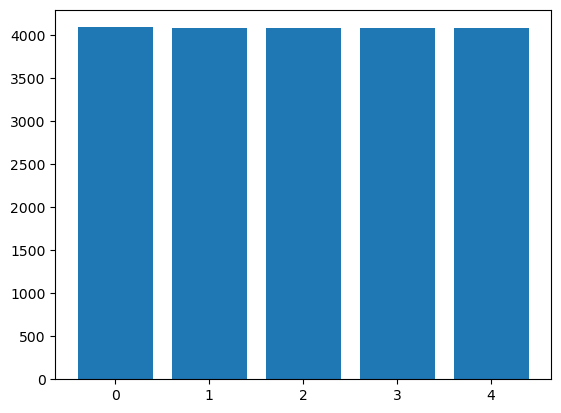

In [334]:
aux = np.unique(df['median_house_value_discrete'], return_counts=True)
plt.bar(aux[0], aux[1])
plt.show()

1.- Divide los datos en los conjuntos de entrenamiento y test (recuerda la función 'train_test_split()')

3.- Ahora necesitamos estandarizar los datos, usa 'StandarScaler()' para estandarizar SOLO las variables predictoras

Ten encuenta también los métodos del scaler y las diferencias entre 'fit' y 'transform'

4.- Genera un modelo de regresión logística y entrénalo con los datos estandarizados ('LogisticRegression()')

5.- Obtén las métricas del modelo en entrenamiento y test.

Recuerda las funciones 'ConfusionMatrixDisplay'

6.- Con el siguiente código podemos generar las curvas ROC y el AUC correspondiente

El método de pandas 'get_dummies' nos realiza el one hot encoding de nuestra variable categórica.

Esto es pasar de una variable con 5 valores (entre 0 y 4 dependiendo de la categoría)

In [354]:
test.median_house_value_discrete

14416    3
16383    1
7731     3
1410     3
1335     2
        ..
16764    3
5762     3
12862    0
18814    0
12852    0
Name: median_house_value_discrete, Length: 6130, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

A 5 variables con ceros cuando no pertenece a esa categoría y unos cuando sí lo hace

In [355]:
pd.get_dummies(test.median_house_value_discrete)

,0,1,2,3,4
14416,0,0,0,1,0
16383,0,1,0,0,0
7731,0,0,0,1,0
1410,0,0,0,1,0
1335,0,0,1,0,0
...,...,...,...,...,...
16764,0,0,0,1,0
5762,0,0,0,1,0
12862,1,0,0,0,0
18814,1,0,0,0,0


In [359]:
# Recuerda sustituir model_lr por el nombre de tu modelo
predictions = model_lr.predict_proba(scaler.transform(train.drop(columns=['median_house_value_discrete'])))

y_test = np.array(pd.get_dummies(train['median_house_value_discrete']))
y_score = predictions

n_classes = 5

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], umbral = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
plt.figure(figsize=(5, 5))
lw = 2
plt.plot(
    fpr[0],
    tpr[0],
    color="darkorange",
    lw=lw,
    label="ROC curve 0 (area = %0.2f)" % roc_auc[0],
)
plt.plot(
    fpr[1],
    tpr[1],
    color="red",
    lw=lw,
    label="ROC curve 1 (area = %0.2f)" % roc_auc[1],
)
plt.plot(
    fpr[2],
    tpr[2],
    color="blue",
    lw=lw,
    label="ROC curve 2 (area = %0.2f)" % roc_auc[2],
)
plt.plot(
    fpr[3],
    tpr[3],
    color="green",
    lw=lw,
    label="ROC curve 3 (area = %0.2f)" % roc_auc[3],
)
plt.plot(
    fpr[4],
    tpr[4],
    color="grey",
    lw=lw,
    label="ROC curve 4 (area = %0.2f)" % roc_auc[4],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

7.- Repetimos pero con los datos de test

In [361]:
# Recuerda sustituir model_lr por el nombre de tu modelo
predictions = model_lr.predict_proba(scaler.transform(test.drop(columns=['median_house_value_discrete'])))

y_test = np.array(pd.get_dummies(test['median_house_value_discrete']))
y_score = predictions

n_classes = 5

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], umbral = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
plt.figure(figsize=(5, 5))
lw = 2
plt.plot(
    fpr[0],
    tpr[0],
    color="darkorange",
    lw=lw,
    label="ROC curve 0 (area = %0.2f)" % roc_auc[0],
)
plt.plot(
    fpr[1],
    tpr[1],
    color="red",
    lw=lw,
    label="ROC curve 1 (area = %0.2f)" % roc_auc[1],
)
plt.plot(
    fpr[2],
    tpr[2],
    color="blue",
    lw=lw,
    label="ROC curve 2 (area = %0.2f)" % roc_auc[2],
)
plt.plot(
    fpr[3],
    tpr[3],
    color="green",
    lw=lw,
    label="ROC curve 3 (area = %0.2f)" % roc_auc[3],
)
plt.plot(
    fpr[4],
    tpr[4],
    color="grey",
    lw=lw,
    label="ROC curve 4 (area = %0.2f)" % roc_auc[4],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

## Decision tree

Pasamos ahora al árbol de decisión para clasificación

1.- Selecciona un número limitado de observaciones para construir un árbol que se pueda visualizar (quédate con entre 5 y 10 muestras)

2.- Crea un modelo de árbol de decisión para regresión ('DecisionTreeClassifier()') y entrénalo con los datos seleccionados.

Ten en cuenta los parámetros más importantes, echa un ojo a la documentación.

3.- Representa el árbol de decisión ('plot_tree()'). 

En la documentación puedes ver la explicación de los parámetros si necesitas alguno para mejorar la visualización.

4.- Obtén la matriz de confusión de este árbol sobre el conjunto de test

5.- Entrena ahora un árbol con todos los datos de entrenamiento e intenta graficarlo (si te es posible).

Recuerda que ya hemos dividido anteriormente el conjunto en entrenamiento y test, si no, no podríamos comparar los resultados entre modelos.

6.- Obtén la matriz de confusión del modelo en entrenaiento y test.

7.- Con el siguiente código podemos generar las curvas ROC y el AUC correspondiente

El método de pandas 'get_dummies' nos realiza el one hot encoding de nuestra variable categórica.

Esto es pasar de una variable con 5 valores (entre 0 y 4 dependiendo de la categoría)

In [354]:
test.median_house_value_discrete

14416    3
16383    1
7731     3
1410     3
1335     2
        ..
16764    3
5762     3
12862    0
18814    0
12852    0
Name: median_house_value_discrete, Length: 6130, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

A 5 variables con ceros cuando no pertenece a esa categoría y unos cuando sí lo hace

In [355]:
pd.get_dummies(test.median_house_value_discrete)

,0,1,2,3,4
14416,0,0,0,1,0
16383,0,1,0,0,0
7731,0,0,0,1,0
1410,0,0,0,1,0
1335,0,0,1,0,0
...,...,...,...,...,...
16764,0,0,0,1,0
5762,0,0,0,1,0
12862,1,0,0,0,0
18814,1,0,0,0,0


In [372]:
# Recuerda sustituir model_dtc por el nombre de tu modelo
predictions = model_dtc.predict_proba(train.drop(columns=['median_house_value_discrete']))

y_test = np.array(pd.get_dummies(train['median_house_value_discrete']))
y_score = predictions

n_classes = 5

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], umbral = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
plt.figure(figsize=(5, 5))
lw = 2
plt.plot(
    fpr[0],
    tpr[0],
    color="darkorange",
    lw=lw,
    label="ROC curve 0 (area = %0.2f)" % roc_auc[0],
)
plt.plot(
    fpr[1],
    tpr[1],
    color="red",
    lw=lw,
    label="ROC curve 1 (area = %0.2f)" % roc_auc[1],
)
plt.plot(
    fpr[2],
    tpr[2],
    color="blue",
    lw=lw,
    label="ROC curve 2 (area = %0.2f)" % roc_auc[2],
)
plt.plot(
    fpr[3],
    tpr[3],
    color="green",
    lw=lw,
    label="ROC curve 3 (area = %0.2f)" % roc_auc[3],
)
plt.plot(
    fpr[4],
    tpr[4],
    color="grey",
    lw=lw,
    label="ROC curve 4 (area = %0.2f)" % roc_auc[4],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

7.- Repetimos pero con los datos de test

In [375]:
# Recuerda sustituir model_dtc por el nombre de tu modelo
predictions = model_dtc.predict_proba(test.drop(columns=['median_house_value_discrete']))

y_test = np.array(pd.get_dummies(test['median_house_value_discrete']))
y_score = predictions

n_classes = 5

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], umbral = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
plt.figure(figsize=(5, 5))
lw = 2
plt.plot(
    fpr[0],
    tpr[0],
    color="darkorange",
    lw=lw,
    label="ROC curve 0 (area = %0.2f)" % roc_auc[0],
)
plt.plot(
    fpr[1],
    tpr[1],
    color="red",
    lw=lw,
    label="ROC curve 1 (area = %0.2f)" % roc_auc[1],
)
plt.plot(
    fpr[2],
    tpr[2],
    color="blue",
    lw=lw,
    label="ROC curve 2 (area = %0.2f)" % roc_auc[2],
)
plt.plot(
    fpr[3],
    tpr[3],
    color="green",
    lw=lw,
    label="ROC curve 3 (area = %0.2f)" % roc_auc[3],
)
plt.plot(
    fpr[4],
    tpr[4],
    color="grey",
    lw=lw,
    label="ROC curve 4 (area = %0.2f)" % roc_auc[4],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

## Random forest

1.- Selecciona un número limitado de observaciones para construir un árbol que se pueda visualizar (quédate con entre 5 y 10 muestras)

2.- Crea un modelo de random forest para regresión ('RandomForestClassifier()') y entrénalo con los datos seleccionados. Fija el parámetro necesario para que haya un total de 9 árboles.

Ten en cuenta los parámetros más importantes, echa un ojo a la documentación.

3.- Ejecuta este código para representar los 9 árboles de tu random forest.

In [ ]:
def get_grid(k, n):
    return k // n, k % n
fig, ax = plt.subplots(figsize=(14, 14), nrows=3, ncols=3)

# IMPORTANTE
# En enumerate(model_rf.estimators_) tienes que sustituir model_rf por el nombre que le hayas puesto a tu modelo
for k, tree in enumerate(model_rf.estimators_):
    i, j = get_grid(k, 3)
    plot_tree(tree, feature_names=datos.columns, impurity=False, ax=ax[i][j])
fig.show()

4.- Obtén la matriz de confusión de este árbol sobre el conjunto de test

5.- Entrena ahora un random forest con todos los datos de entrenamiento.

Recuerda que ya hemos dividido anteriormente el conjunto en entrenamiento y test, si no, no podríamos comparar los resultados entre modelos.

6.- Obtén la matriz de confusión del modelo en entrenaiento y test.

7.- Con el siguiente código podemos generar las curvas ROC y el AUC correspondiente

El método de pandas 'get_dummies' nos realiza el one hot encoding de nuestra variable categórica.

Esto es pasar de una variable con 5 valores (entre 0 y 4 dependiendo de la categoría)

In [354]:
test.median_house_value_discrete

14416    3
16383    1
7731     3
1410     3
1335     2
        ..
16764    3
5762     3
12862    0
18814    0
12852    0
Name: median_house_value_discrete, Length: 6130, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

A 5 variables con ceros cuando no pertenece a esa categoría y unos cuando sí lo hace

In [355]:
pd.get_dummies(test.median_house_value_discrete)

,0,1,2,3,4
14416,0,0,0,1,0
16383,0,1,0,0,0
7731,0,0,0,1,0
1410,0,0,0,1,0
1335,0,0,1,0,0
...,...,...,...,...,...
16764,0,0,0,1,0
5762,0,0,0,1,0
12862,1,0,0,0,0
18814,1,0,0,0,0


In [387]:
# Recuerda sustituir model_rfc por el nombre de tu modelo
predictions = model_rfc.predict_proba(train.drop(columns=['median_house_value_discrete']))

y_test = np.array(pd.get_dummies(train['median_house_value_discrete']))
y_score = predictions

n_classes = 5

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], umbral = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
plt.figure(figsize=(5, 5))
lw = 2
plt.plot(
    fpr[0],
    tpr[0],
    color="darkorange",
    lw=lw,
    label="ROC curve 0 (area = %0.2f)" % roc_auc[0],
)
plt.plot(
    fpr[1],
    tpr[1],
    color="red",
    lw=lw,
    label="ROC curve 1 (area = %0.2f)" % roc_auc[1],
)
plt.plot(
    fpr[2],
    tpr[2],
    color="blue",
    lw=lw,
    label="ROC curve 2 (area = %0.2f)" % roc_auc[2],
)
plt.plot(
    fpr[3],
    tpr[3],
    color="green",
    lw=lw,
    label="ROC curve 3 (area = %0.2f)" % roc_auc[3],
)
plt.plot(
    fpr[4],
    tpr[4],
    color="grey",
    lw=lw,
    label="ROC curve 4 (area = %0.2f)" % roc_auc[4],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

7.- Repetimos pero con los datos de test

In [389]:
# Recuerda sustituir model_dtc por el nombre de tu modelo
predictions = model_rfc.predict_proba(test.drop(columns=['median_house_value_discrete']))

y_test = np.array(pd.get_dummies(test['median_house_value_discrete']))
y_score = predictions

n_classes = 5

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], umbral = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
plt.figure(figsize=(5, 5))
lw = 2
plt.plot(
    fpr[0],
    tpr[0],
    color="darkorange",
    lw=lw,
    label="ROC curve 0 (area = %0.2f)" % roc_auc[0],
)
plt.plot(
    fpr[1],
    tpr[1],
    color="red",
    lw=lw,
    label="ROC curve 1 (area = %0.2f)" % roc_auc[1],
)
plt.plot(
    fpr[2],
    tpr[2],
    color="blue",
    lw=lw,
    label="ROC curve 2 (area = %0.2f)" % roc_auc[2],
)
plt.plot(
    fpr[3],
    tpr[3],
    color="green",
    lw=lw,
    label="ROC curve 3 (area = %0.2f)" % roc_auc[3],
)
plt.plot(
    fpr[4],
    tpr[4],
    color="grey",
    lw=lw,
    label="ROC curve 4 (area = %0.2f)" % roc_auc[4],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()